In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import math

Question 1: 

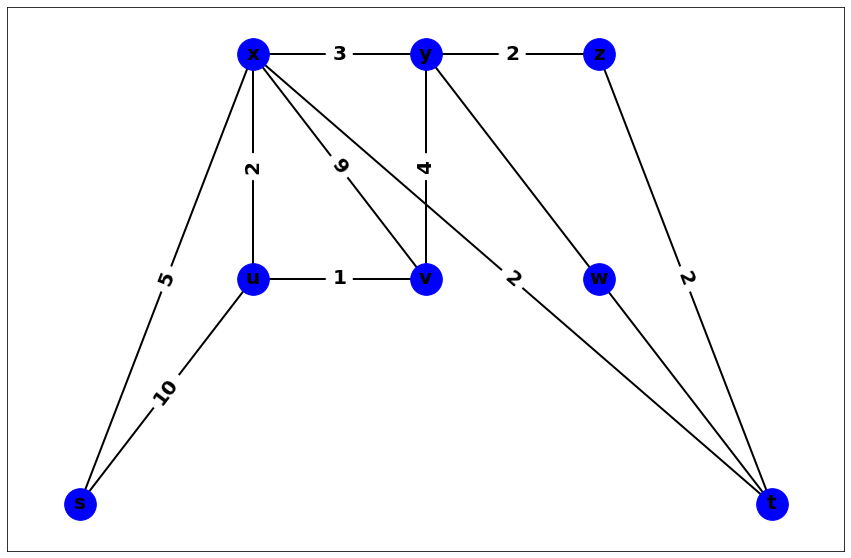

In [19]:
plt.figure(figsize=(15, 10))
# Create a graph
G = nx.Graph()

# Add nodes alphabetically
G.add_nodes_from(['s', 't', 'u', 'v', 'w', 'x', 'y', 'z'])

# Add edges with capacities
G.add_edge('s', 'u', capacity=10)
G.add_edge('s', 'x', capacity=5)
G.add_edge('u', 'v', capacity=1)
G.add_edge('u', 'x', capacity=2)
G.add_edge('v', 'y', capacity=4)
G.add_edge('x', 'v', capacity=9)
G.add_edge('x', 'y', capacity=3)
G.add_edge('x', 't', capacity=2)
G.add_edge('y', 't', capacity=3)
G.add_edge('y', 'z', capacity=2)
G.add_edge('z', 't', capacity=2)

# dictionary of capacities
capacities = nx.get_edge_attributes(G, 'capacity')

# dictionary of flows
flows = nx.get_edge_attributes(G, 'flow')

# dictionary of positions
pos = {'s': (0, 0), 't': (4, 0), 'u': (1, 1), 'v': (2, 1), 'w': (3, 1), 'x': (1, 2), 'y': (2, 2), 'z': (3, 2)}

# plot the graph
nx.draw_networkx(G, pos, with_labels=True, node_size=1000, node_color='blue', font_size=20, font_color='k', font_weight='bold', width=2, edge_color='k', alpha=1)

# plot the capacities
nx.draw_networkx_edge_labels(G, pos, edge_labels=capacities, font_size=20, font_color='k', font_weight='bold', label_pos=0.5)

# plot the flows
nx.draw_networkx_edge_labels(G, pos, edge_labels=flows, font_size=20, font_color='r', font_weight='bold', label_pos=0.5)

# show the plot
plt.show()

Question 2

In [26]:

def SA(initial_state, T, alpha, max_iterations):
    state = initial_state
    for i in range(max_iterations):
        T = T * alpha
        neighbor = get_neighbor(state)
        if VALUE(neighbor) < VALUE(state):
            state = neighbor
        else:
            if random.random() < math.exp(-VALUE(neighbor)/T):
                state = neighbor
    return state

def get_neighbor(state):
    neighbor = state
    while neighbor == state:
        neighbor = random_neighbor(state)
    return neighbor

def random_neighbor(state):
    neighbor = state
    return neighbor

def VALUE(state):
    value = 0
    for node in state:
        if node != 's' and node != 't':
            if sum(state[node]) != sum(state[node]):
                value = value + 1
    return value

### Question 3

In [21]:

"""
Run the Edmonds Karp algorithm from Networkx and present its answer to the total flow into the sink node t. 
"""

# Edmonds Karp algorithm from Networkx
flow_value, flow_dict = nx.maximum_flow(G, 's', 't')

# Print the flow value
print('The maximum flow value is', flow_value)

# Print the flow dictionary
print('The flow dictionary is', flow_dict)


The maximum flow value is 7
The flow dictionary is {'s': {'u': 3, 'x': 4}, 't': {'x': 0, 'y': 0, 'z': 0}, 'u': {'s': 0, 'v': 1, 'x': 2}, 'v': {'u': 0, 'y': 3, 'x': 0}, 'w': {}, 'x': {'s': 0, 'u': 0, 'v': 2, 'y': 2, 't': 2}, 'y': {'v': 0, 'x': 0, 't': 3, 'z': 2}, 'z': {'y': 0, 't': 2}}


Question 4: 

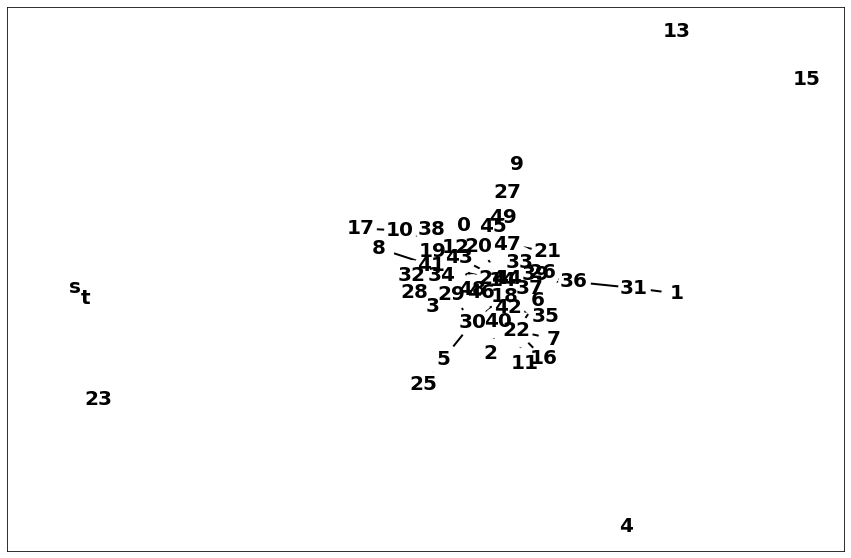

In [23]:
"""
Run your SA code on a graph G containing 50 nodes and average connectivity of 3 (connectivity parameter of 0.06). Using your VALUE function work out the weighted flow value wf across the entire graph G and compare t with the total flow value tf_opt returned by the Edmonds Karp algorithm. Present both values, tf and tf_opt. 
"""

# Create a graph
plt.figure(figsize=(15, 10))
G = nx.gnp_random_graph(50, 0.06)

# adding nodes
G.add_nodes_from(['s', 't'])

# adding edges
G.add_edge('s', 't', capacity=10)

# dictionary of capacities
capacities = nx.get_edge_attributes(G, 'capacity')

# dictionary of flows
flows = nx.get_edge_attributes(G, 'flow')

# dictionary of positions
pos = nx.spring_layout(G)

# plot the graph
nx.draw_networkx(G, pos, with_labels=True, node_size=1000, node_color='w', font_size=20, font_color='k', font_weight='bold', width=2, edge_color='k', alpha=1)

# plot the capacities
nx.draw_networkx_edge_labels(G, pos, edge_labels=capacities, font_size=20, font_color='k', font_weight='bold', label_pos=0.5)

# plot the flows
nx.draw_networkx_edge_labels(G, pos, edge_labels=flows, font_size=20, font_color='r', font_weight='bold', label_pos=0.5)

# show the plot
plt.show()



In [27]:
# Run the Edmonds Karp algorithm from Networkx
flow_value, flow_dict = nx.maximum_flow(G, 's', 't')

# tf and tf_opt
tf = 0
tf_opt = flow_value

# Print the flow value
print('The maximum flow value is', flow_value)

# Print the flow dictionary
print('The flow dictionary is', flow_dict)

The maximum flow value is 10
The flow dictionary is {0: {34: 0}, 1: {3: 0, 10: 0, 32: 0, 40: 0}, 2: {15: 0, 17: 0, 21: 0, 22: 0, 31: 0}, 3: {1: 0}, 4: {5: 0, 33: 0}, 5: {4: 0, 17: 0, 23: 0, 29: 0}, 6: {7: 0, 9: 0, 28: 0, 49: 0}, 7: {6: 0, 38: 0}, 8: {39: 0}, 9: {6: 0, 17: 0, 35: 0}, 10: {1: 0, 12: 0, 13: 0, 19: 0, 39: 0}, 11: {29: 0}, 12: {10: 0, 24: 0, 26: 0}, 13: {10: 0}, 14: {19: 0, 33: 0}, 15: {2: 0}, 16: {17: 0}, 17: {2: 0, 5: 0, 9: 0, 16: 0, 43: 0}, 18: {22: 0, 26: 0}, 19: {10: 0, 14: 0, 34: 0}, 20: {24: 0}, 21: {2: 0, 29: 0, 38: 0}, 22: {2: 0, 18: 0, 32: 0}, 23: {5: 0, 47: 0}, 24: {12: 0, 20: 0}, 25: {32: 0}, 26: {12: 0, 18: 0, 46: 0}, 27: {33: 0, 38: 0}, 28: {6: 0, 29: 0, 32: 0, 49: 0}, 29: {5: 0, 11: 0, 21: 0, 28: 0}, 30: {34: 0}, 31: {2: 0, 47: 0}, 32: {1: 0, 22: 0, 25: 0, 28: 0}, 33: {4: 0, 14: 0, 27: 0}, 34: {0: 0, 19: 0, 30: 0, 47: 0}, 35: {9: 0, 44: 0, 47: 0}, 36: {}, 37: {41: 0, 45: 0}, 38: {7: 0, 21: 0, 27: 0}, 39: {8: 0, 10: 0}, 40: {1: 0, 45: 0}, 41: {37: 0}, 42: {}, 

Question 5:

In [ ]:
"""
a. Run your SA code with 30 different graphs G (having 50 nodes and an average connectivity of 3). Work out the average value of the total flow into sink node t. Present the total flow tf_avg(3). 						(10 marks)
b. Now re-run your SA code on 30 different graphs of 50 nodes but an average connectivity of 2. Compute and present the average flow tf_av(2). 	(10 marks)
c. Do you notice a significant difference between tf_avg(3) and tf_avg(2)? If so, why do you think this occurs?
"""

# a. Run your SA code with 30 different graphs G (having 50 nodes and an average connectivity of 3). Work out the average value of the total flow into sink node t. Present the total flow tf_avg(3).

# list of graphs
graphs = []

# 30 graphs
for i in range(30):
    G = nx.gnp_random_graph(50, 0.06)
    # add nodes
    G.add_nodes_from(['s', 't'])
    # add edges
    G.add_edge('s', 't', capacity=10)
    # add the graph to the list
    graphs.append(G)

# list of flow values
flow_values = []

# Edmonds Karp algorithm from Networkx
for i in range(30):
    flow_value, flow_dict = nx.maximum_flow(graphs[i], 's', 't')
    flow_values.append(flow_value)


# Print the average flow value
print('The average flow value is', sum(flow_values)/len(flow_values))


The average flow value is 10.0


In [25]:
# b. Now re-run your SA code on 30 different graphs of 50 nodes but an average connectivity of 2. Compute and present the average flow tf_av(2). 	(10 marks)
# Create a list of graphs
graphs = []

# Create 30 graphs
for i in range(30):
    G = nx.gnp_random_graph(50, 0.04)
    # add nodes
    G.add_nodes_from(['s', 't'])
    # add edges
    G.add_edge('s', 't', capacity=10)
    # add the graph to the list
    graphs.append(G)

# Create a list of flow values
flow_values = []

# Run the Edmonds Karp algorithm from Networkx
for i in range(30):
    flow_value, flow_dict = nx.maximum_flow(graphs[i], 's', 't')
    flow_values.append(flow_value)


# Print the average flow value
print('The average flow value is', sum(flow_values)/len(flow_values))

The average flow value is 10.0
